# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Faiz Muhammad Risyad - 21102278
2. Ramadhan Rafli Pratama - 21102271

### Latar Belakang
Penilaian properti real estate merupakan aspek penting dalam pengelolaan aset, investasi, dan pengambilan keputusan ekonomi. Penelitian ini bertujuan untuk memprediksi harga properti per unit area menggunakan **Support Vector Regression (SVR)**. Dataset yang digunakan mencakup berbagai variabel seperti usia rumah, jarak ke stasiun MRT terdekat, jumlah toko serba ada, serta koordinat geografis. SVR dipilih karena kemampuannya dalam menangkap pola data yang rumit secara efektif. Hasil penelitian ini diharapkan dapat mendukung pengambilan keputusan yang lebih akurat dalam sektor properti.

###Import Libraries

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

###Load Dataset

In [21]:
# Load the dataset
df = pd.read_excel('Real estate valuation data set.xlsx')

# Rename columns for easier reference
df.columns = [
    "No", "transaction_date", "house_age", "distance_to_mrt",
    "num_convenience_stores", "latitude", "longitude", "house_price"
]

###Data Preprocessing

In [22]:
# Data Preprocessing
# Drop unnecessary columns
df = df.drop(columns=["No"])

# Handle missing values (if any)
if df.isnull().sum().sum() > 0:
    df = df.dropna()

####Normalize Target

In [23]:
# Normalize the target variable (house_price)
target_scaler = MinMaxScaler()
df["house_price_normalized"] = target_scaler.fit_transform(df[["house_price"]])

####Split Features and Target

In [24]:
# Split features and target
X = df.drop(columns=["house_price", "house_price_normalized"])
y = df["house_price_normalized"]

####Standardize Fetures

In [25]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

####Split Data Train and Test

In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

###Exploration Data Analysis

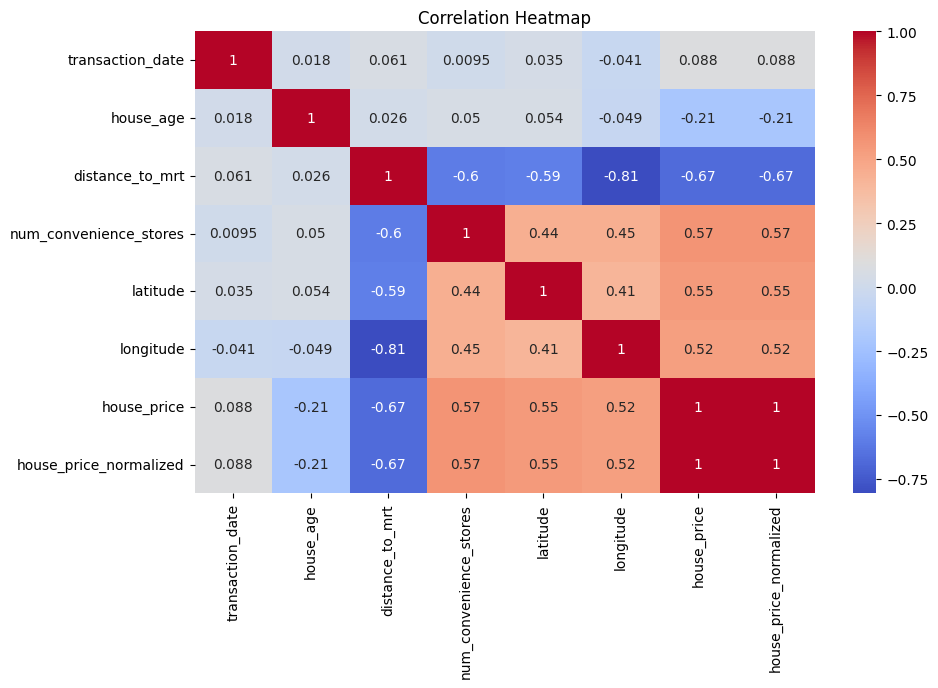

In [27]:
# Exploration Data Analysis
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

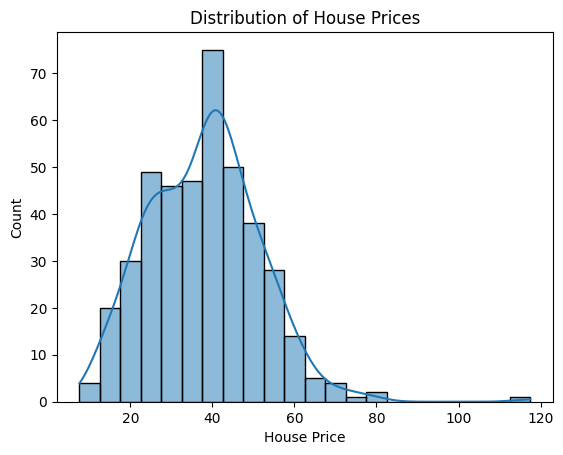

In [28]:
# Distribution of target variable
sns.histplot(df["house_price"], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("House Price")
plt.show()

## Ringkasan Metode
Penelitian ini menggunakan metode **Support Vector Regression (SVR)** untuk memprediksi harga properti per unit area berdasarkan dataset valuasi real estate. Proses penelitian dimulai dengan pengolahan data, termasuk pembersihan data, normalisasi, dan pembagian dataset menjadi data pelatihan dan pengujian. Selanjutnya, model SVR diterapkan dengan memilih kernel yang sesuai untuk mengetahui hubungan non-linear antara variabel input (seperti usia rumah, jarak ke stasiun MRT, jumlah toko serba ada, dan koordinat geografis) dan output (harga properti per unit area). Model dievaluasi menggunakan metrik kinerja seperti Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) untuk menilai akurasi prediksi. Hasilnya akan dianalisis untuk memahami faktor-faktor yang paling memengaruhi harga properti.  

###Baseline Model

In [29]:
# Baseline Model
baseline_model = SVR()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)
print(f"Baseline RMSE (Normalized): {baseline_rmse:.4f}")
print(f"Baseline MAE (Normalized): {baseline_mae:.4f}")
print(f"Baseline MSE (Normalized): {baseline_mse:.4f}")
print(f"Baseline R2 Score: {baseline_r2:.4f}")

Baseline RMSE (Normalized): 0.0714
Baseline MAE (Normalized): 0.0572
Baseline MSE (Normalized): 0.0051
Baseline R2 Score: 0.6325


###Hyeperparameter Tuning

In [30]:
# Model Exploration (Hyperparameter Tuning)
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

In [31]:
# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


###Evaluation Best Model

In [32]:
# Evaluate the best model
y_pred_best = grid_search.best_estimator_.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
best_mae = mean_absolute_error(y_test, y_pred_best)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f"Best Model RMSE (Normalized): {best_rmse:.4f}")
print(f"Best Model MAE (Normalized): {best_mae:.4f}")
print(f"Best Model MSE (Normalized): {best_mse:.4f}")
print(f"Best Model R2 Score: {best_r2:.4f}")

Best Model RMSE (Normalized): 0.0714
Best Model MAE (Normalized): 0.0572
Best Model MSE (Normalized): 0.0051
Best Model R2 Score: 0.6325


In [33]:
# Denormalize predictions and calculate metrics on original scale
y_test_original = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_best_original = target_scaler.inverse_transform(y_pred_best.reshape(-1, 1))
original_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_best_original))
original_mae = mean_absolute_error(y_test_original, y_pred_best_original)
original_mse = mean_squared_error(y_test_original, y_pred_best_original)

print(f"Best Model RMSE (Original Scale): {original_rmse:.2f}")
print(f"Best Model MAE (Original Scale): {original_mae:.2f}")
print(f"Best Model MSE (Original Scale): {original_mse:.2f}")

Best Model RMSE (Original Scale): 7.85
Best Model MAE (Original Scale): 6.29
Best Model MSE (Original Scale): 61.65


####Train and Exploration Model

In [34]:
# Additional Exploration Models
# Model 1: RBF Kernel with C=1, epsilon=0.1
model_rbf = SVR(kernel='rbf', C=1, epsilon=0.1)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)

# Model 2: Linear Kernel with C=1, epsilon=0.2
model_linear = SVR(kernel='linear', C=1, epsilon=0.2)
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Model 3: Polynomial Kernel with C=1, epsilon=0.1, degree=2
model_poly = SVR(kernel='poly', C=1, epsilon=0.1, degree=2)
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

In [35]:
# Evaluation
models = {
    "Baseline": (y_pred_baseline, baseline_rmse, baseline_mae, baseline_mse, baseline_r2),
    "Best Model": (y_pred_best, best_rmse, best_mae, best_mse, best_r2),
    "RBF Kernel": (y_pred_rbf,
                    np.sqrt(mean_squared_error(y_test, y_pred_rbf)),
                    mean_absolute_error(y_test, y_pred_rbf),
                    mean_squared_error(y_test, y_pred_rbf),
                    r2_score(y_test, y_pred_rbf)),
    "Linear Kernel": (y_pred_linear,
                       np.sqrt(mean_squared_error(y_test, y_pred_linear)),
                       mean_absolute_error(y_test, y_pred_linear),
                       mean_squared_error(y_test, y_pred_linear),
                       r2_score(y_test, y_pred_linear)),
    "Polynomial Kernel": (y_pred_poly,
                           np.sqrt(mean_squared_error(y_test, y_pred_poly)),
                           mean_absolute_error(y_test, y_pred_poly),
                           mean_squared_error(y_test, y_pred_poly),
                           r2_score(y_test, y_pred_poly))
}

In [36]:
# Display results
for model_name, (y_pred, rmse, mae, mse, r2) in models.items():
    print(f"{model_name} - RMSE (Normalized): {rmse:.2f}, MAE (Normalized): {mae:.2f}, MSE (Normalized): {mse:.2f}, R2 Score: {r2:.2f}")

Baseline - RMSE (Normalized): 0.07, MAE (Normalized): 0.06, MSE (Normalized): 0.01, R2 Score: 0.63
Best Model - RMSE (Normalized): 0.07, MAE (Normalized): 0.06, MSE (Normalized): 0.01, R2 Score: 0.63
RBF Kernel - RMSE (Normalized): 0.07, MAE (Normalized): 0.06, MSE (Normalized): 0.01, R2 Score: 0.63
Linear Kernel - RMSE (Normalized): 0.09, MAE (Normalized): 0.07, MSE (Normalized): 0.01, R2 Score: 0.44
Polynomial Kernel - RMSE (Normalized): 0.10, MAE (Normalized): 0.07, MSE (Normalized): 0.01, R2 Score: 0.31


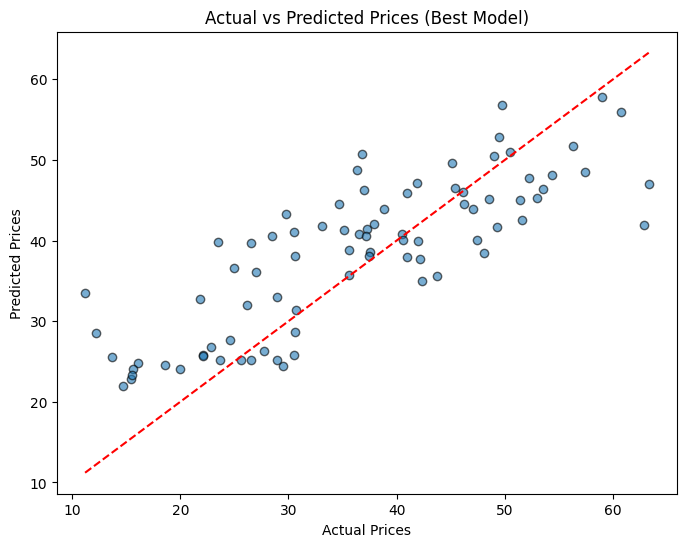

In [37]:
# Visualize Actual vs Predicted for Best Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_best_original, alpha=0.6, edgecolor='k')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')
plt.title("Actual vs Predicted Prices (Best Model)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

#### Hasil dan Analisis
### **Hasil dan Pembahasan**  
Berdasarkan evaluasi model yang dilakukan, hasil metrik kinerja untuk berbagai model adalah sebagai berikut:  

- Baseline Model: Memberikan nilai RMSE dan MAE yang sama dengan Best Model dalam skala normalisasi, dengan R² Score
sebesar 0.63.  
- Best Model (RBF Kernel): Menggunakan parameter terbaik (`C=1`, `epsilon=0.1`, `kernel=rbf`) dan menunjukkan kinerja terbaik dengan RMSE Normalized: 0.0714, MAE Normalized: 0.0572, dan R² Score: 0.6325. Dalam skala asli, RMSE mencapai 7.85, MAE sebesar 6.29, dan MSE sebesar 61.65.  
- RBF Kernel: Kinerjanya mendekati Best Model dengan nilai metrik serupa, menunjukkan bahwa kernel RBF sangat cocok untuk data ini.  
- Linear Kernel: Memiliki performa lebih rendah dengan R² Score: 0.44, yang menunjukkan bahwa hubungan antara variabel input dan output tidak cukup linear untuk dimodelkan dengan kernel ini.  
- Polynomial Kernel: Menunjukkan performa terburuk dengan R² Score: 0.31, menunjukkan bahwa kernel polinomial kurang cocok untuk menangkap hubungan antar variabel pada dataset ini.  

Dari hasil tersebut, Best Model dengan kernel RBF memberikan hasil yang lebih konsisten dan akurat dibandingkan model lainnya, membuktikan bahwa pendekatan non-linear sesuai untuk dataset ini.

#### Kesimpulan
Penelitian ini menunjukkan bahwa model Support Vector Regression (SVR) dengan kernel RBF memiliki kinerja terbaik dalam memprediksi harga properti per unit area. Parameter optimal yang digunakan (C=1, epsilon=0.1) memberikan prediksi yang cukup akurat dengan R² Score sebesar 0.63 dalam skala normalisasi. Model ini efektif menangkap hubungan non-linear antara fitur seperti usia rumah, jarak ke stasiun MRT, jumlah toko serba ada, dan harga properti.

Kesimpulan ini mendukung pemanfaatan SVR dengan kernel RBF untuk analisis prediktif pada data properti dan menunjukkan potensi aplikasi model ini dalam mendukung pengambilan keputusan di sektor real estate.